In [3]:
# import mel spectra
BASE_FOLDER = '../../'
%run -i ..\..\utility\feature_extractor\JupyterLoad_feature_extractor.py

load feature_extractor_mother
load feature_extractor_mel_spectra
load feature_extractor_psd


# Design the hyperparameter on example

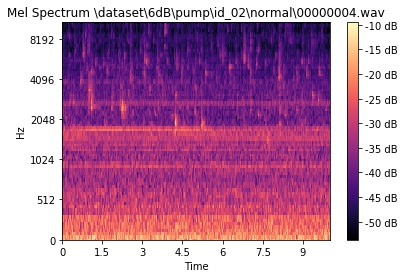

'nm80'

In [5]:
# example to tune paramters
file_path = r'\dataset\6dB\pump\id_02\normal\00000004.wav'
fe_mel = feature_extractor_mel(BASE_FOLDER,'v1')
fe_mel.set_hyperparamter(n_fft=1024, n_mels=80, hop_length=512)
fe_mel.create_from_wav(file_path,0)
fe_mel.plot()
plt.show()
fe_mel.flat_feature().shape
fe_mel.file_name_mainhyperparastr

# check run

In [7]:
%run -i ..\..\utility\CleanAextract_to_PandasPickles.py
CleanAextract_to_PandasPickles(base_folder=BASE_FOLDER,
                                   target_folder= r'\dataset\MEL_to_Pandas\data',
                                   FileFindDict = {'SNR': '6dB',
                                                  'machine': 'pump', 
                                                  'ID': ['00']},
                                   FileCountLimit = 5,
                                   CleanerObj = None,
                                   FeatureExtractorObj = fe_mel,
                                   verbose=2,
                                   ).head()

100%|██████████| 10/10 [00:02<00:00,  3.73it/s]


,path,abnormal,ID,file,machine,SNR,MELv1_nm80_ch0
0,\dataset\6dB\pump\id_00\normal\00000000.wav,0,00,00000000,pump,6dB,\dataset\MEL_to_Pandas\data\MELv1_nm80_ch0_6dB...
1,\dataset\6dB\pump\id_00\normal\00000001.wav,0,00,00000001,pump,6dB,\dataset\MEL_to_Pandas\data\MELv1_nm80_ch0_6dB...
2,\dataset\6dB\pump\id_00\normal\00000002.wav,0,00,00000002,pump,6dB,\dataset\MEL_to_Pandas\data\MELv1_nm80_ch0_6dB...
3,\dataset\6dB\pump\id_00\normal\00000003.wav,0,00,00000003,pump,6dB,\dataset\MEL_to_Pandas\data\MELv1_nm80_ch0_6dB...
4,\dataset\6dB\pump\id_00\normal\00000004.wav,0,00,00000004,pump,6dB,\dataset\MEL_to_Pandas\data\MELv1_nm80_ch0_6dB...


## Test Reload 

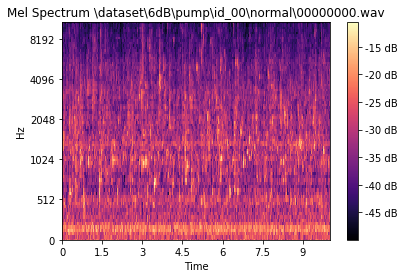

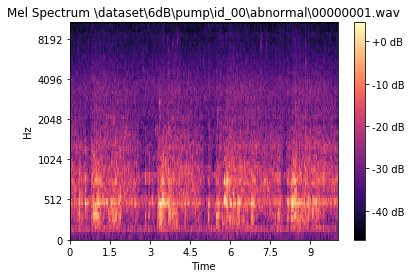

In [9]:
df = pd.read_pickle(r'.\data\FEpandas_MELv1_nm80_ch0.pkl')

fe1 = feature_extractor_from_file(BASE_FOLDER + df.MELv1_nm80_ch0.loc[0],
                                 BASE_FOLDER)

fe2 = feature_extractor_from_file(BASE_FOLDER + df.MELv1_nm80_ch0.loc[6],
                                 BASE_FOLDER)

fe1.plot()
plt.show()
fe2.plot()
#plt.legend()

In [14]:
#TF = r'\dataset\MEL_to_Pandas\data'
def process_set(FileFindDict):
    tf = r'\dataset\MEL_to_Pandas\data_{}_{}'.format(FileFindDict['SNR']
                                    , FileFindDict['machine'])
    df = CleanAextract_to_PandasPickles(base_folder=BASE_FOLDER,
                                   target_folder= tf,
                                   FileFindDict = FileFindDict,
                                   FileCountLimit = None,
                                   CleanerObj = None,
                                   FeatureExtractorObj = fe_mel,
                                   verbose=2,
                                   )



#process_set({'SNR': '6dB','machine': 'pump','ID': ['00','02','04','06']}) # 15:30min 806MB | 21:37min
#process_set({'SNR': '6dB','machine': 'slider','ID': ['00','02','04','06']}) # | 21:59min
#process_set({'SNR': '6dB','machine': 'fan','ID': ['00','02','04','06']}) # | 26:13min
#process_set({'SNR': '6dB','machine': 'valve','ID': ['00','02','04','06']}) # | 22:25min
#process_set({'SNR': 'min6dB','machine': 'pump','ID': ['00','02','04','06']})
#process_set({'SNR': 'min6dB','machine': 'valve','ID': ['00','02','04','06']})
#process_set({'SNR': 'min6dB','machine': 'slider','ID': ['00','02','04','06']})
#process_set({'SNR': 'min6dB','machine': 'fan','ID': ['00','02','04','06']})
#process_set({'SNR': '0dB','machine': 'pump','ID': ['00','02','04','06']})
#process_set({'SNR': '0dB','machine': 'vave','ID': ['00','02','04','06']})
#process_set({'SNR': '0dB','machine': 'slider','ID': ['00','02','04','06']})
#process_set({'SNR': '0dB','machine': 'fan','ID': ['00','02','04','06']})

100%|██████████| 4170/4170 [20:44<00:00,  3.35it/s]
